In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Generating City list

In [2]:
#defining lists for holding latitude, longitude and cities
lat_lng = []
cities = []

# creating a list of random latitudes and longitudes
lat = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lng = np.random.uniform(lng_range[0], lng_range[1], size = 1500)
lat_lngs = zip(lat, lng)

#Identifying nearest city for each latitude and longitude
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    if city not in cities:
        cities.append(city)
        

#perform city count
len(cities)
cities


['mataura',
 'cidreira',
 'novyy urengoy',
 'dikson',
 'juan lacaze',
 'rundu',
 'sola',
 'bata',
 'hobart',
 'illoqqortoormiut',
 'santiago de cao',
 'kununurra',
 'chapais',
 'joshimath',
 'praia da vitoria',
 'avarua',
 'sao joao da barra',
 'bredasdorp',
 'samana',
 'kaitangata',
 'albany',
 'bengkulu',
 'tuktoyaktuk',
 'buala',
 'kodiak',
 'hilo',
 'port alfred',
 'los algarrobos',
 'nishihara',
 'hithadhoo',
 'cairns',
 'qaanaaq',
 'sao filipe',
 'busselton',
 'severo-kurilsk',
 'meulaboh',
 'puerto ayora',
 'rikitea',
 'barentsburg',
 'vaini',
 'ust-kuyga',
 'pevek',
 'luena',
 'pitimbu',
 'thompson',
 'ambilobe',
 'yellowknife',
 'ostrovnoy',
 'namibe',
 'arlit',
 'jamestown',
 'new norfolk',
 'umzimvubu',
 'ushuaia',
 'castro',
 'cayenne',
 'saint-philippe',
 'saint-augustin',
 'punta arenas',
 'samusu',
 'portland',
 'kurilsk',
 'klaksvik',
 'attawapiskat',
 'vostok',
 'bluff',
 'georgetown',
 'beira',
 'astana',
 'chokurdakh',
 'saldanha',
 'aflu',
 'cape town',
 'taolanaro'

# Perform API calls

. Perform weather check in each city using series of successive API calls

. print the city name as it is being processed

In [3]:

#creating lists for different weather parameters
city_list = []
lng_list = []
lat_list = []
temp_list = []
humidity_list = []
windspeed_list =[]
cloudiness_list = []
country_list = []
date_list = []

counter = 0
record_counter = 0
setcount = 1


# weather api url : https://api.openweathermap.org/data/2.5/weather?q={city name}&appid={API key}
base_url = "https://api.openweathermap.org/data/2.5/weather?q="
#using for loop to check weather in each city using weather api call
for city in cities:
    counter +=1
    if (counter % 50 == 0):
        setcount += 1
        record_counter = 0
        
    record_counter += 1
    print("Processing Record " + str(record_counter) + " of Set " + str(setcount) + " | " + city)
    
    try:
        url = f"{base_url}{city}&appid={weather_api_key}"
        response = requests.get(url)
        json_response = response.json()
        city_list.append(json_response["name"])
        lat_list.append(json_response["coord"]["lat"])
        lng_list.append(json_response["coord"]["lon"])
        temp_list.append(json_response["main"]["temp"])
        humidity_list.append(json_response["main"]["humidity"])
        windspeed_list.append(json_response["wind"]["speed"])
        cloudiness_list.append(json_response["clouds"]["all"])
        country_list.append(json_response["sys"]["country"])
        date_list.append(json_response["dt"])
        
    except:
        print("City not found. Skipping...")
        
        
    
    


Processing Record 1 of Set 1 | mataura
Processing Record 2 of Set 1 | cidreira
Processing Record 3 of Set 1 | novyy urengoy
Processing Record 4 of Set 1 | dikson
Processing Record 5 of Set 1 | juan lacaze
Processing Record 6 of Set 1 | rundu
Processing Record 7 of Set 1 | sola
Processing Record 8 of Set 1 | bata
Processing Record 9 of Set 1 | hobart
Processing Record 10 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 11 of Set 1 | santiago de cao
Processing Record 12 of Set 1 | kununurra
Processing Record 13 of Set 1 | chapais
Processing Record 14 of Set 1 | joshimath
Processing Record 15 of Set 1 | praia da vitoria
Processing Record 16 of Set 1 | avarua
Processing Record 17 of Set 1 | sao joao da barra
Processing Record 18 of Set 1 | bredasdorp
Processing Record 19 of Set 1 | samana
Processing Record 20 of Set 1 | kaitangata
Processing Record 21 of Set 1 | albany
Processing Record 22 of Set 1 | bengkulu
Processing Record 23 of Set 1 | tuktoyaktuk
Processing R

Processing Record 39 of Set 4 | mogadishu
Processing Record 40 of Set 4 | geraldton
Processing Record 41 of Set 4 | pouembout
Processing Record 42 of Set 4 | jaciara
Processing Record 43 of Set 4 | alice springs
Processing Record 44 of Set 4 | grand river south east
City not found. Skipping...
Processing Record 45 of Set 4 | isangel
Processing Record 46 of Set 4 | hermanus
Processing Record 47 of Set 4 | sangmelima
Processing Record 48 of Set 4 | cherskiy
Processing Record 49 of Set 4 | iqaluit
Processing Record 50 of Set 4 | molina
Processing Record 1 of Set 5 | beloha
Processing Record 2 of Set 5 | victoria
Processing Record 3 of Set 5 | mahebourg
Processing Record 4 of Set 5 | sant feliu de guixols
Processing Record 5 of Set 5 | bethel
Processing Record 6 of Set 5 | port elizabeth
Processing Record 7 of Set 5 | avera
Processing Record 8 of Set 5 | cilegon
Processing Record 9 of Set 5 | halalo
City not found. Skipping...
Processing Record 10 of Set 5 | te anau
Processing Record 11 of

Processing Record 27 of Set 8 | bubaque
Processing Record 28 of Set 8 | batouri
Processing Record 29 of Set 8 | constitucion
Processing Record 30 of Set 8 | cheltenham
Processing Record 31 of Set 8 | hovd
Processing Record 32 of Set 8 | mlowo
Processing Record 33 of Set 8 | marcona
City not found. Skipping...
Processing Record 34 of Set 8 | kirakira
Processing Record 35 of Set 8 | bajil
Processing Record 36 of Set 8 | ljungby
Processing Record 37 of Set 8 | batagay-alyta
Processing Record 38 of Set 8 | bagra
Processing Record 39 of Set 8 | mandalgovi
Processing Record 40 of Set 8 | saint-denis
Processing Record 41 of Set 8 | strzelin
Processing Record 42 of Set 8 | nueve de julio
Processing Record 43 of Set 8 | conceicao do araguaia
Processing Record 44 of Set 8 | shahrud
Processing Record 45 of Set 8 | sao jose da coroa grande
Processing Record 46 of Set 8 | doka
Processing Record 47 of Set 8 | talcahuano
Processing Record 48 of Set 8 | balkhash
Processing Record 49 of Set 8 | richard

Processing Record 15 of Set 12 | qasigiannguit
Processing Record 16 of Set 12 | lata
Processing Record 17 of Set 12 | ouesso
Processing Record 18 of Set 12 | ilebo
Processing Record 19 of Set 12 | dodge city
Processing Record 20 of Set 12 | zemio
Processing Record 21 of Set 12 | houma
Processing Record 22 of Set 12 | libertad
Processing Record 23 of Set 12 | markova
Processing Record 24 of Set 12 | roura
Processing Record 25 of Set 12 | xuddur
Processing Record 26 of Set 12 | honiara
Processing Record 27 of Set 12 | merauke
Processing Record 28 of Set 12 | kommunisticheskiy
Processing Record 29 of Set 12 | zlitan
Processing Record 30 of Set 12 | hunza
City not found. Skipping...
Processing Record 31 of Set 12 | chanute
Processing Record 32 of Set 12 | moroni
Processing Record 33 of Set 12 | la ronge
Processing Record 34 of Set 12 | moyale
Processing Record 35 of Set 12 | yecla
Processing Record 36 of Set 12 | storslett
Processing Record 37 of Set 12 | marrakesh
Processing Record 38 of 

# Convert raw data to DataFrame


In [4]:
#define the data into dictionary
dict = {"City":city_list, "country":country_list, "Date": date_list, "Latitude": lat_list, "Longitude": lng_list, 
        "Max_temp":temp_list, "Humidity": humidity_list, "Cloudiness": cloudiness_list, "Wind Speed": windspeed_list}

weather_df = pd.DataFrame(dict)
weather_df.head()


,City,country,Date,Latitude,Longitude,Max_temp,Humidity,Cloudiness,Wind Speed
0,Mataura,NZ,1650139304,-46.1927,168.8643,276.75,96,68,1.22
1,Cidreira,BR,1650139304,-30.1811,-50.2056,292.73,68,100,3.42
2,Novy Urengoy,RU,1650139121,66.0833,76.6333,264.11,92,100,7.57
3,Dikson,RU,1650139305,73.5069,80.5464,261.80,94,100,7.26
4,Juan Lacaze,UY,1650139305,-34.4342,-57.4381,293.21,65,29,5.74


In [19]:
# exporting the dataframe to csv
weather_df.to_csv("weather_data.csv", index = False)

# Plotting the data


# 1. Latitude vs Temperature plot


Text(0, 0.5, 'Temperature (k)')

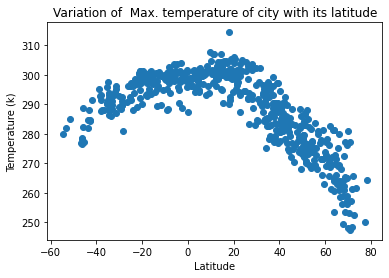

In [18]:
x_values = weather_df["Latitude"]
y_values = weather_df["Max_temp"]
plt.scatter(x_values, y_values)
plt.title("Variation of  Max. temperature of city with its latitude")
plt.xlabel("Latitude")
plt.ylabel("Temperature (k)")

# 2. Latitude vs Humidity plot

Text(0, 0.5, 'Humidity')

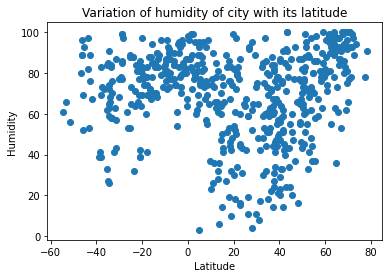

In [6]:
x_values = weather_df["Latitude"]
y_values = weather_df["Humidity"]
plt.scatter(x_values, y_values)
plt.title("Variation of humidity of city with its latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

# 3. Latitude vs Cloudiness plot

Text(0, 0.5, 'Cloudiness')

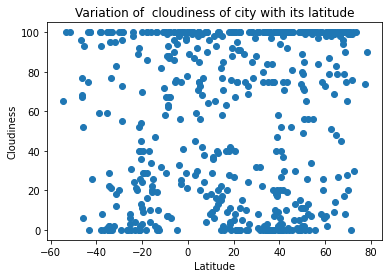

In [7]:
x_values = weather_df["Latitude"]
y_values = weather_df["Cloudiness"]
plt.scatter(x_values, y_values)
plt.title("Variation of  cloudiness of city with its latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

# 4. Latitude vs Wind speed plot

Text(0, 0.5, 'Wind speed')

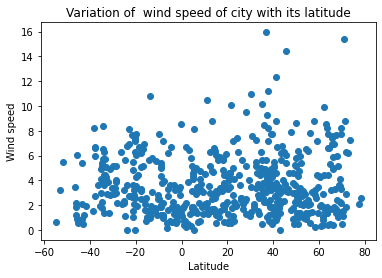

In [8]:
x_values = weather_df["Latitude"]
y_values = weather_df["Wind Speed"]
plt.scatter(x_values, y_values)
plt.title("Variation of  wind speed of city with its latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind speed")

# Calculating linear Regression

# 1. Latitude vs Temperature: Northen hemisphere

Correlation coef (r) = -0.88


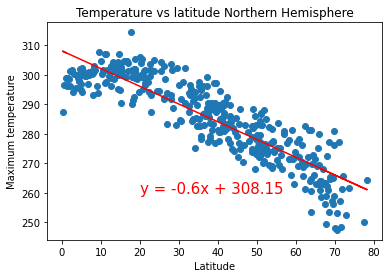

In [9]:
weather_north = pd.DataFrame(weather_df.loc[weather_df["Latitude"]>0])
x_values = weather_north["Latitude"]
y_values = weather_north["Max_temp"]

#calculating correlation
correlation = st.pearsonr(x_values, y_values)
print(f"Correlation coef (r) = {round(correlation[0],2)}")

#calculating Regression

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,260),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Maximum temperature')
plt.title("Temperature vs latitude Northern Hemisphere")

plt.show()

# 2. Latitude vs temperature: southern hemisphere

Correlation coef (r) = 0.75


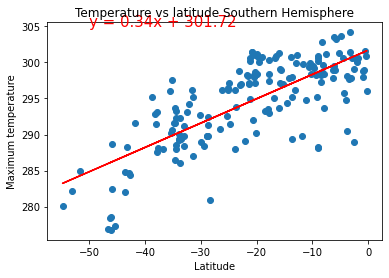

In [10]:
weather_south = pd.DataFrame(weather_df.loc[weather_df["Latitude"]<0])
x_values = weather_south["Latitude"]
y_values = weather_south["Max_temp"]

#calculating correlation
correlation = st.pearsonr(x_values, y_values)
print(f"Correlation coef (r) = {round(correlation[0],2)}")

#calculating Regression

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,305),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Maximum temperature')
plt.title("Temperature vs latitude Southern Hemisphere")
plt.show()

# 3. Latitude vs Humidity: Northen Hemisphere

Correlation coef (r) = 0.24


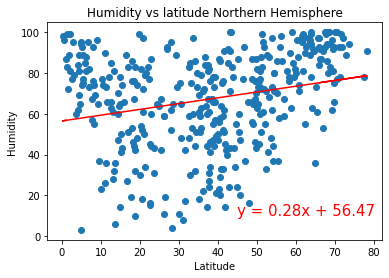

In [11]:
x_values = weather_north["Latitude"]
y_values = weather_north["Humidity"]

#calculating correlation
correlation = st.pearsonr(x_values, y_values)
print(f"Correlation coef (r) = {round(correlation[0],2)}")

#calculating Regression

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title("Humidity vs latitude Northern Hemisphere")

plt.show()

# 4. Latitude vs Humidity : Southern Hemisphere

Correlation coef (r) = 0.31


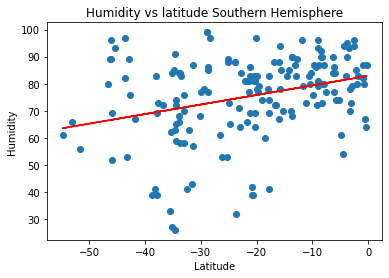

In [12]:
x_values = weather_south["Latitude"]
y_values = weather_south["Humidity"]

#calculating correlation
correlation = st.pearsonr(x_values, y_values)
print(f"Correlation coef (r) = {round(correlation[0],2)}")

#calculating Regression

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title("Humidity vs latitude Southern Hemisphere")

plt.show()

# 5. Latitude vs Wind speed: Northen Hemisphere

Correlation coef (r) = 0.08


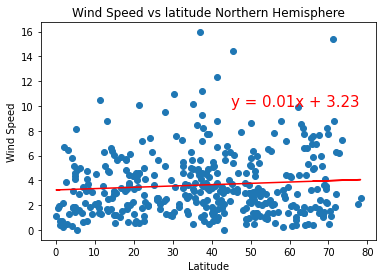

In [13]:
x_values = weather_north["Latitude"]
y_values = weather_north["Wind Speed"]

#calculating correlation
correlation = st.pearsonr(x_values, y_values)
print(f"Correlation coef (r) = {round(correlation[0],2)}")

#calculating Regression

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title("Wind Speed vs latitude Northern Hemisphere")

plt.show()

# 6. Latitude vs Wind speed : Southern Hemisphere

Correlation coef (r) = -0.13


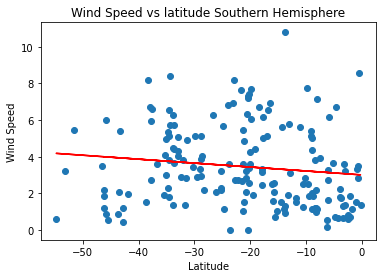

In [14]:
x_values = weather_south["Latitude"]
y_values = weather_south["Wind Speed"]

#calculating correlation
correlation = st.pearsonr(x_values, y_values)
print(f"Correlation coef (r) = {round(correlation[0],2)}")

#calculating Regression

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title("Wind Speed vs latitude Southern Hemisphere")

plt.show()

# 7. Latitude vs cloudiness plot: Northen hemisphere

Correlation coef (r) = 0.13


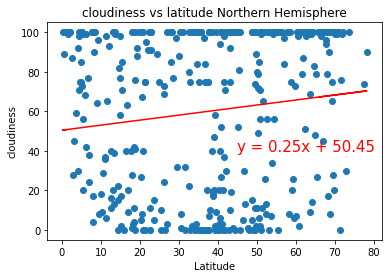

In [16]:
x_values = weather_north["Latitude"]
y_values = weather_north["Cloudiness"]

#calculating correlation
correlation = st.pearsonr(x_values, y_values)
print(f"Correlation coef (r) = {round(correlation[0],2)}")

#calculating Regression

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,40),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('cloudiness')
plt.title("cloudiness vs latitude Northern Hemisphere")

plt.show()

# Latitude vs cloudiness southern hemisphere

Correlation coef (r) = 0.12


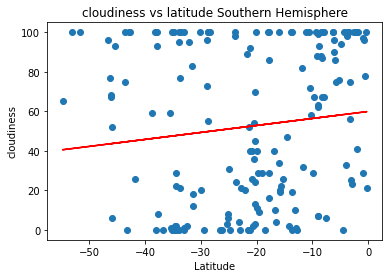

In [17]:
x_values = weather_south["Latitude"]
y_values = weather_south["Cloudiness"]

#calculating correlation
correlation = st.pearsonr(x_values, y_values)
print(f"Correlation coef (r) = {round(correlation[0],2)}")

#calculating Regression

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,40),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('cloudiness')
plt.title("cloudiness vs latitude Southern Hemisphere")

plt.show()